# Linear autoencoder

In [14]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Data loading
batch_size = 64

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size,
    shuffle=True
)



In [3]:
import torch.nn as nn
import torch.nn.functional as F


class Autoencoder(nn.Module):
    def __init__(self, encoding_dim):
        super(Autoencoder, self).__init__()
        self.fc1 = nn.Linear(28*28, encoding_dim)
        self.fc2 = nn.Linear(encoding_dim, 28*28)
        

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

model = Autoencoder(32)

In [4]:
model

Autoencoder(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=784, bias=True)
)

In [5]:
lr = 0.001
epochs = 10
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [6]:
for epoch in range(1, epochs+1):
    # train loss for each epoch
    train_loss = 0.0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.view(data.size(0), -1)
        optimizer.zero_grad()
        
        outputs = model(data)
        loss = criterion(outputs, data)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)
    
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tItem Loss: {:.6f}, Train Loss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item(), train_loss))
            
    train_loss /= len(train_loader)
    
    print('\nTrain set: Overall train loss: {:.4f}\n'.format(train_loss))

Train Epoch: 1 [0/60000 (0%)]	Item Loss: 1.278752, Train Loss: 81.840157
Train Epoch: 1 [6400/60000 (11%)]	Item Loss: 0.759653, Train Loss: 5578.821987
Train Epoch: 1 [12800/60000 (21%)]	Item Loss: 0.658490, Train Loss: 10026.326561
Train Epoch: 1 [19200/60000 (32%)]	Item Loss: 0.607910, Train Loss: 14175.130207
Train Epoch: 1 [25600/60000 (43%)]	Item Loss: 0.600441, Train Loss: 18144.080215
Train Epoch: 1 [32000/60000 (53%)]	Item Loss: 0.594678, Train Loss: 21992.800495
Train Epoch: 1 [38400/60000 (64%)]	Item Loss: 0.561173, Train Loss: 25776.134773
Train Epoch: 1 [44800/60000 (75%)]	Item Loss: 0.564663, Train Loss: 29486.388577
Train Epoch: 1 [51200/60000 (85%)]	Item Loss: 0.560818, Train Loss: 33172.950706
Train Epoch: 1 [57600/60000 (96%)]	Item Loss: 0.565808, Train Loss: 36837.129341

Train set: Overall train loss: 40.6807

Train Epoch: 2 [0/60000 (0%)]	Item Loss: 0.553203, Train Loss: 35.405014
Train Epoch: 2 [6400/60000 (11%)]	Item Loss: 0.595528, Train Loss: 3643.178856
Train E

Train Epoch: 10 [51200/60000 (85%)]	Item Loss: 0.525665, Train Loss: 27318.304804
Train Epoch: 10 [57600/60000 (96%)]	Item Loss: 0.558793, Train Loss: 30738.197338

Train set: Overall train loss: 34.0870



In [7]:
# Saving the model
torch.save(model.state_dict(), "mnist_autoencoder.pt")

#### Checking the results

In [8]:
def show_results(source_data, reconstructed_data, index):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
    axes[0].imshow(np.squeeze(source_data[index]), cmap='gray')
    axes[0].set_title('Source image')
    axes[1].imshow(np.squeeze(reconstructed_data[index]), cmap='gray')
    axes[1].set_title('Reconstructed image')

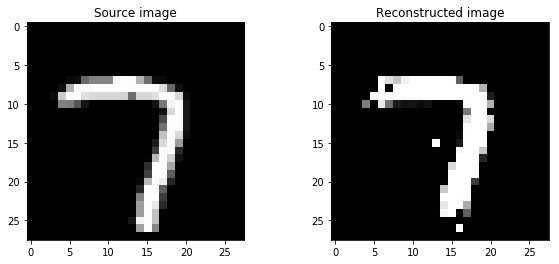

In [13]:
dataiter = iter(test_loader) # get one batch of data
source_data, _ = dataiter.next()

reconstructed_data = model(source_data.view(source_data.size(0), -1))
reconstructed_data = reconstructed_data.view(batch_size, 1, 28, 28)
reconstructed_data = reconstructed_data.detach().numpy()

source_data = source_data.numpy()

show_results(source_data, reconstructed_data, 2)